# Tratamiento de datos ausentes
Tal como vimos anteriormente, no sólo de forma teórica sino muchas veces en el mundo real, es muy posible que se presenten situaciones donde existan datos ausentes. Causas posibles para esto pueden ser fallas en algún paso de la carga de datos, omisión directa de la carga de datos, o bien reticencia de parte de un encuestado a dar una respuesta determinada.

Los datos ausentes son mucho más comunes de lo que podría pensarse, y son un denominador común en muchos problemas de *Data Analytics/Science*. Por lo tanto, es necesario conocer cómo trabajar con ellos.

Como veíamos en la sección anterior, *NumPy* define un dato especial denominado **NaN** (*Not a Number*) que en sí es un dato de tipo punto flotante (en memoria se ve como un número con coma). No obstante, *NaN* tiene propiedades especiales. En primer lugar, cualquier elemento operado con *NaN* da como resultado *NaN*. Esto puede tener consecuencias si no se maneja convenientemente, ya que muchos algoritmos de Aprendizaje Automático no aceptan este tipo de datos. Por lo tanto, puede ser necesario considerar reemplazarlos o manipularlos de algún modo. Una manera básica de hacer esto es operar ignorando los `NaN`, con los operadores nan de NumPy:

In [2]:
import pandas as pd
import numpy as np

valor_nan = np.nan # Defino un nan
print(type(valor_nan))
print(2 * valor_nan) # operaciones con NaNs producen NaNs
print(np.nanprod([2, valor_nan])) # puedo operar con ellos 2*NaN = 2*1
# pero no recomendable para entrenar modelos

<class 'float'>
nan
2.0


Ahora bien, veamos cómo detectar, reemplazar y eliminar estos valores:

In [3]:
s1 = pd.Series([np.nan, np.nan, 20, 30])

s1.isnull() # Consultar si cada valor es nulo

0     True
1     True
2    False
3    False
dtype: bool

In [4]:
s1.isnull().sum() # cuantos son nulos?

2

In [5]:
# dropna: eliminar nulos
s1.dropna()

2    20.0
3    30.0
dtype: float64

In [6]:
# fillna: reemplazar nulos
s1.fillna(0)

0     0.0
1     0.0
2    20.0
3    30.0
dtype: float64

Otro caso: DataFrame

In [7]:
collisions = pd.read_csv("https://raw.githubusercontent.com/ResidentMario/missingno-data/master/nyc_collision_factors.csv")
collisions.sample(2)
# sample: muestra N cantidad de filas aleatoriamente

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
2401,03/04/2016,21:35:00,MANHATTAN,10014.0,40.733054,-74.006408,"(40.733054, -74.0064082)",CHRISTOPHER STREET,HUDSON STREET,NaN,...,Lost Consciousness,NaN,NaN,NaN,NaN,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
2584,10/13/2016,08:10:00,BROOKLYN,11233.0,40.678783,-73.910938,"(40.6787832, -73.9109381)",ROCKAWAY AVENUE,SOMERS STREET,NaN,...,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN


In [8]:
# Conteo de nulos por columnas
# axis=0 : conteo por columnas
collisions.isnull().sum()

DATE                                0
TIME                                0
BOROUGH                           383
ZIP CODE                          384
LATITUDE                            0
LONGITUDE                           0
LOCATION                            0
ON STREET NAME                   1065
CROSS STREET NAME                1137
OFF STREET NAME                  6542
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLISTS INJURED       7303
NUMBER OF CYCLISTS KILLED        7303
CONTRIBUTING FACTOR VEHICLE 1       0
CONTRIBUTING FACTOR VEHICLE 2    1085
CONTRIBUTING FACTOR VEHICLE 3    7000
CONTRIBUTING FACTOR VEHICLE 4    7244
CONTRIBUTING FACTOR VEHICLE 5    7289
VEHICLE TYPE CODE 1                58
VEHICLE TYPE CODE 2              1520
VEHICLE TYPE CODE 3              7019
VEHICLE TYPE CODE 4              7249
VEHICLE TYPE CODE 5              7291
dtype: int64

In [9]:
# Conteo de nulos por filas
# axis=1: conteo por filas
collisions.isnull().sum(axis=1)

0        9
1       11
2        9
3        8
4        9
        ..
7298     9
7299     9
7300     9
7301     9
7302     9
Length: 7303, dtype: int64

In [10]:
# Nulos en total
collisions.isnull().sum().sum()

69872

In [11]:
# Otra opcion para verificar nulos
collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           7303 non-null   object 
 1   TIME                           7303 non-null   object 
 2   BOROUGH                        6920 non-null   object 
 3   ZIP CODE                       6919 non-null   float64
 4   LATITUDE                       7303 non-null   float64
 5   LONGITUDE                      7303 non-null   float64
 6   LOCATION                       7303 non-null   object 
 7   ON STREET NAME                 6238 non-null   object 
 8   CROSS STREET NAME              6166 non-null   object 
 9   OFF STREET NAME                761 non-null    object 
 10  NUMBER OF PERSONS INJURED      7303 non-null   int64  
 11  NUMBER OF PERSONS KILLED       7303 non-null   int64  
 12  NUMBER OF PEDESTRIANS INJURED  7303 non-null   i

## Visualización de datos ausentes
**Missingno** es una biblioteca de *Python* (consulta más información [aquí](https://github.com/ResidentMario/missingno)) diseñada para visualizar datos faltantes en conjuntos de datos. Es especialmente útil en el contexto de la limpieza y el análisis de datos, ya que permite identificar patrones y la distribución de valores nulos de manera clara y efectiva.

In [12]:
!pip install missingno

### Gráficos

* **Matrix**: Muestra un mapa de calor donde cada columna del DataFrame es representada y los valores faltantes son destacados.
* **Bar**: Representa la cantidad de datos faltantes por columna en un gráfico de barras.
* **Heatmap**: Muestra la correlación entre datos faltantes en diferentes columnas, ayudando a identificar si la falta de datos en una columna está relacionada con la falta de datos en otra.
* **Dendrogram**: Proporciona una representación jerárquica de la similitud entre columnas en función de sus patrones de datos faltantes.

Veamos algunas gráficas generadas a partir del conjunto de datos `collisions`:

<Axes: >

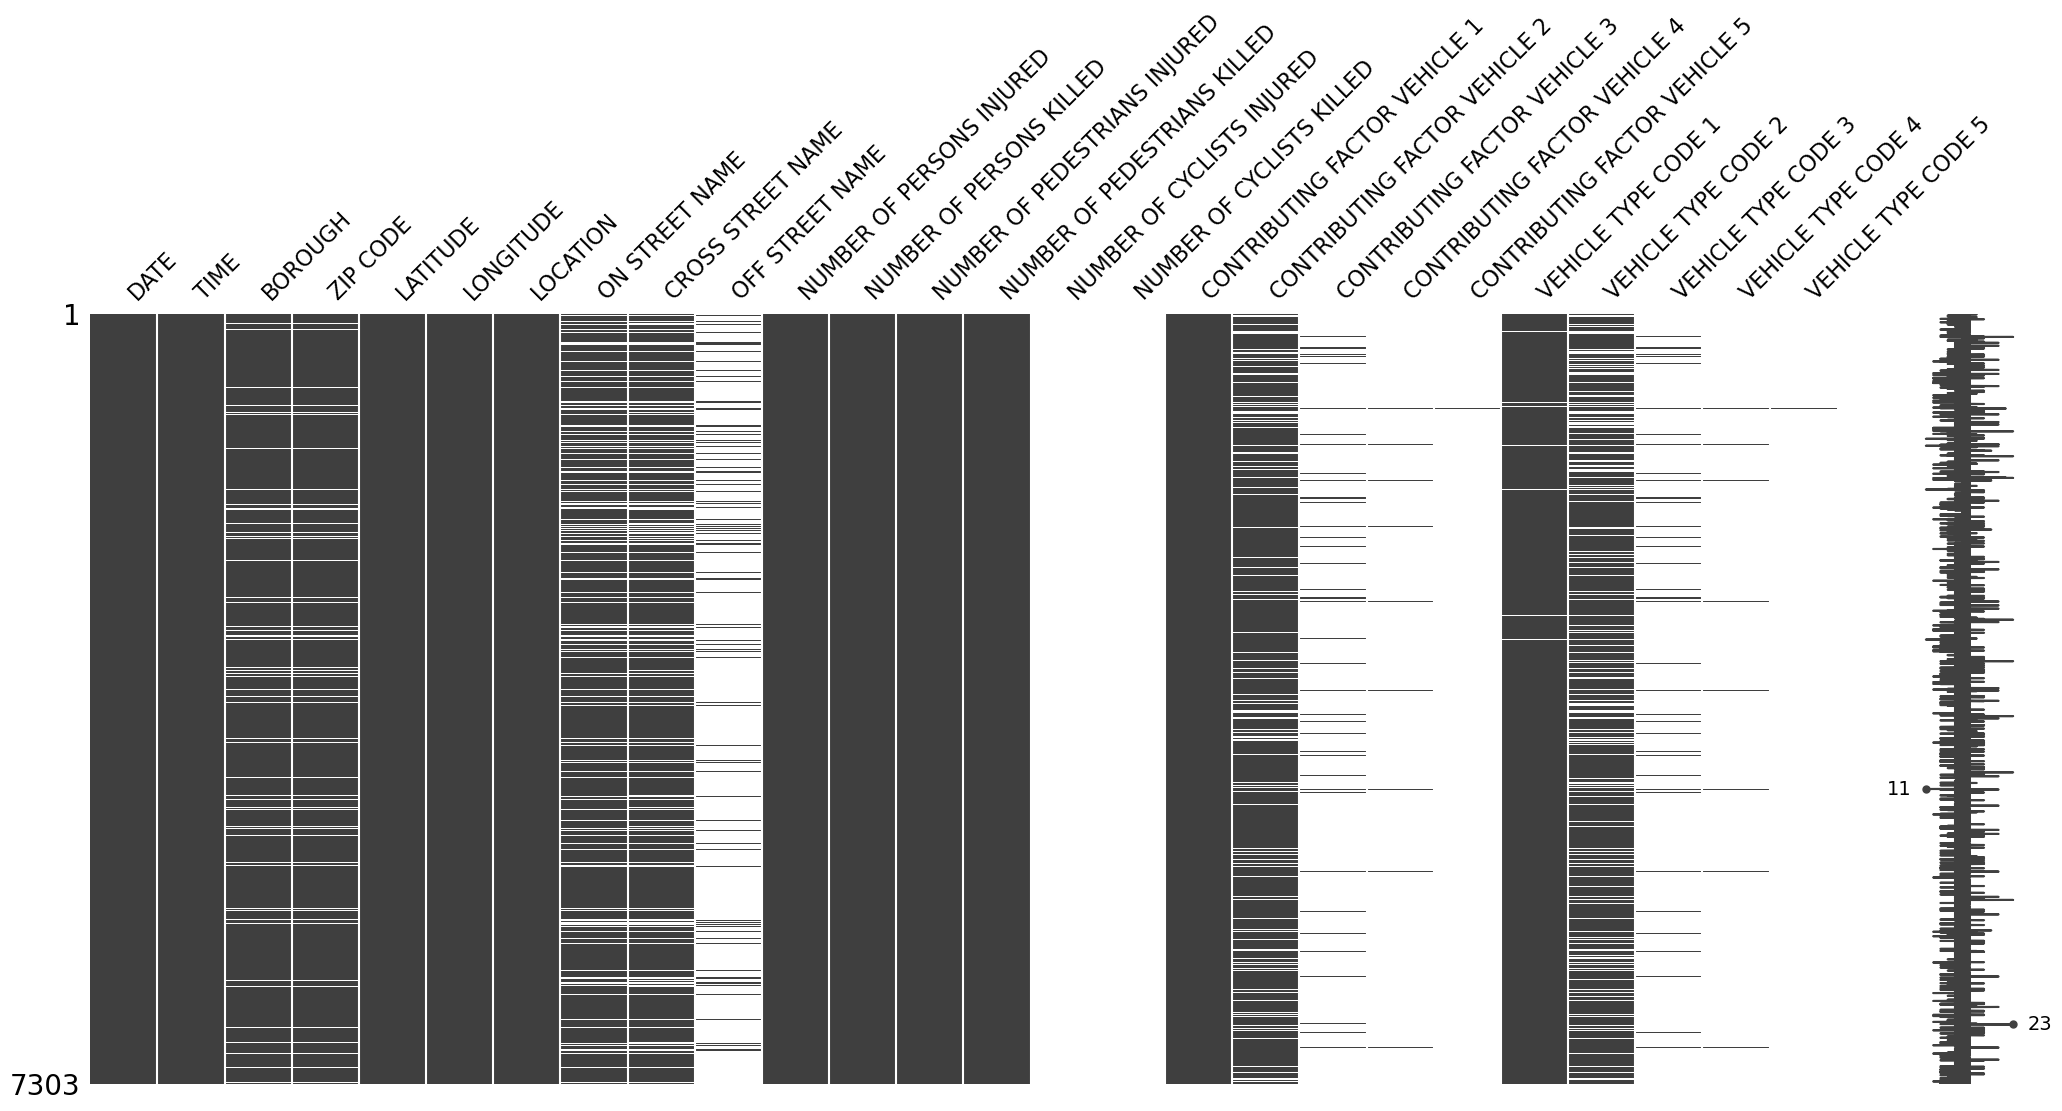

In [13]:
import missingno as msno

msno.matrix(collisions)

* A primera vista, la fecha, la hora, la distribución de las lesiones y el factor de contribución del primer vehículo parecen estar completamente detallados, mientras que la información geográfica parece mayormente completa, pero más irregular.
* El minigráfico de la derecha resume la forma general de la integridad de los datos y señala las filas con la nulidad máxima y mínima en el conjunto de datos.

<Axes: >

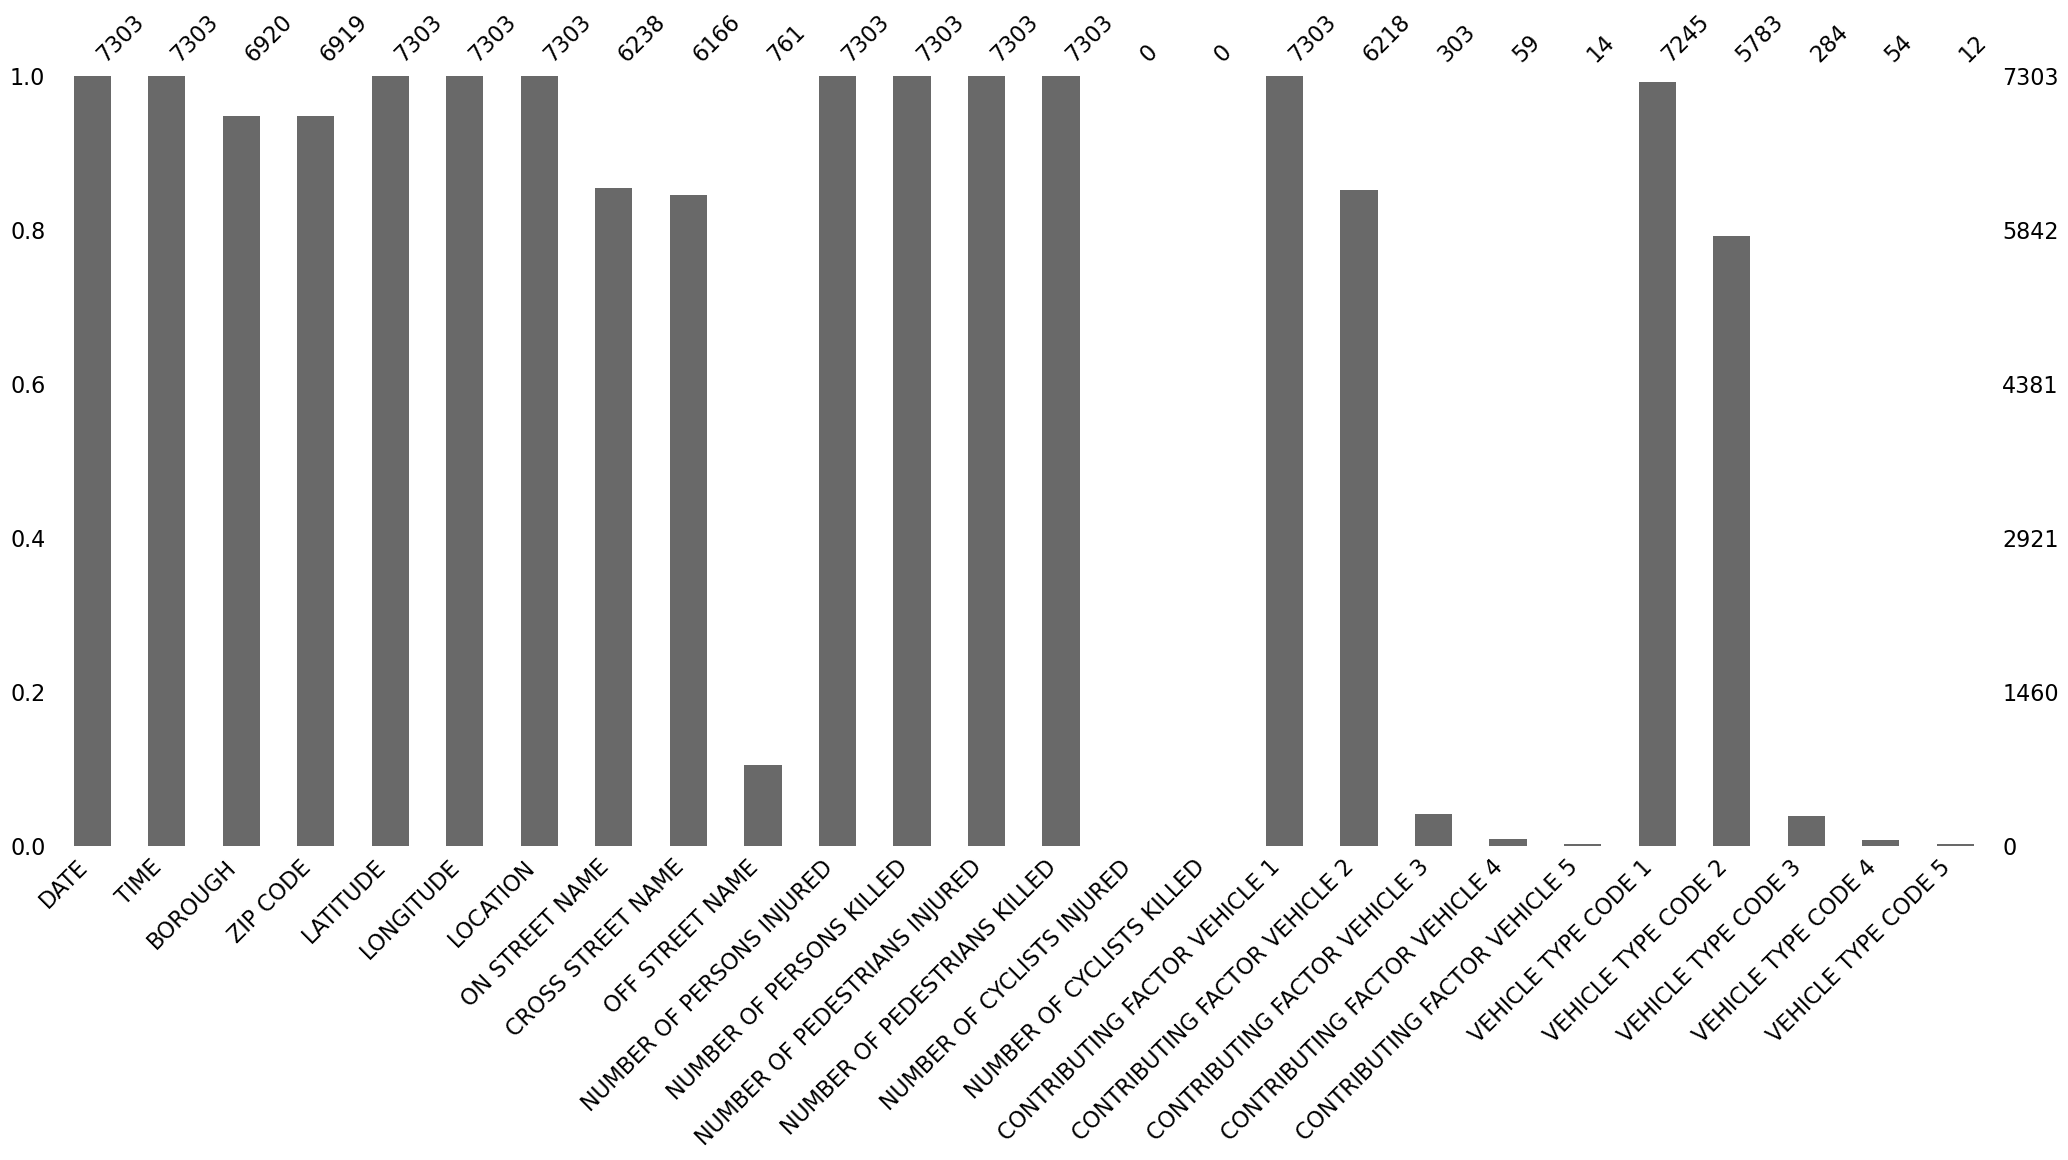

In [14]:
msno.bar(collisions)

<Axes: >

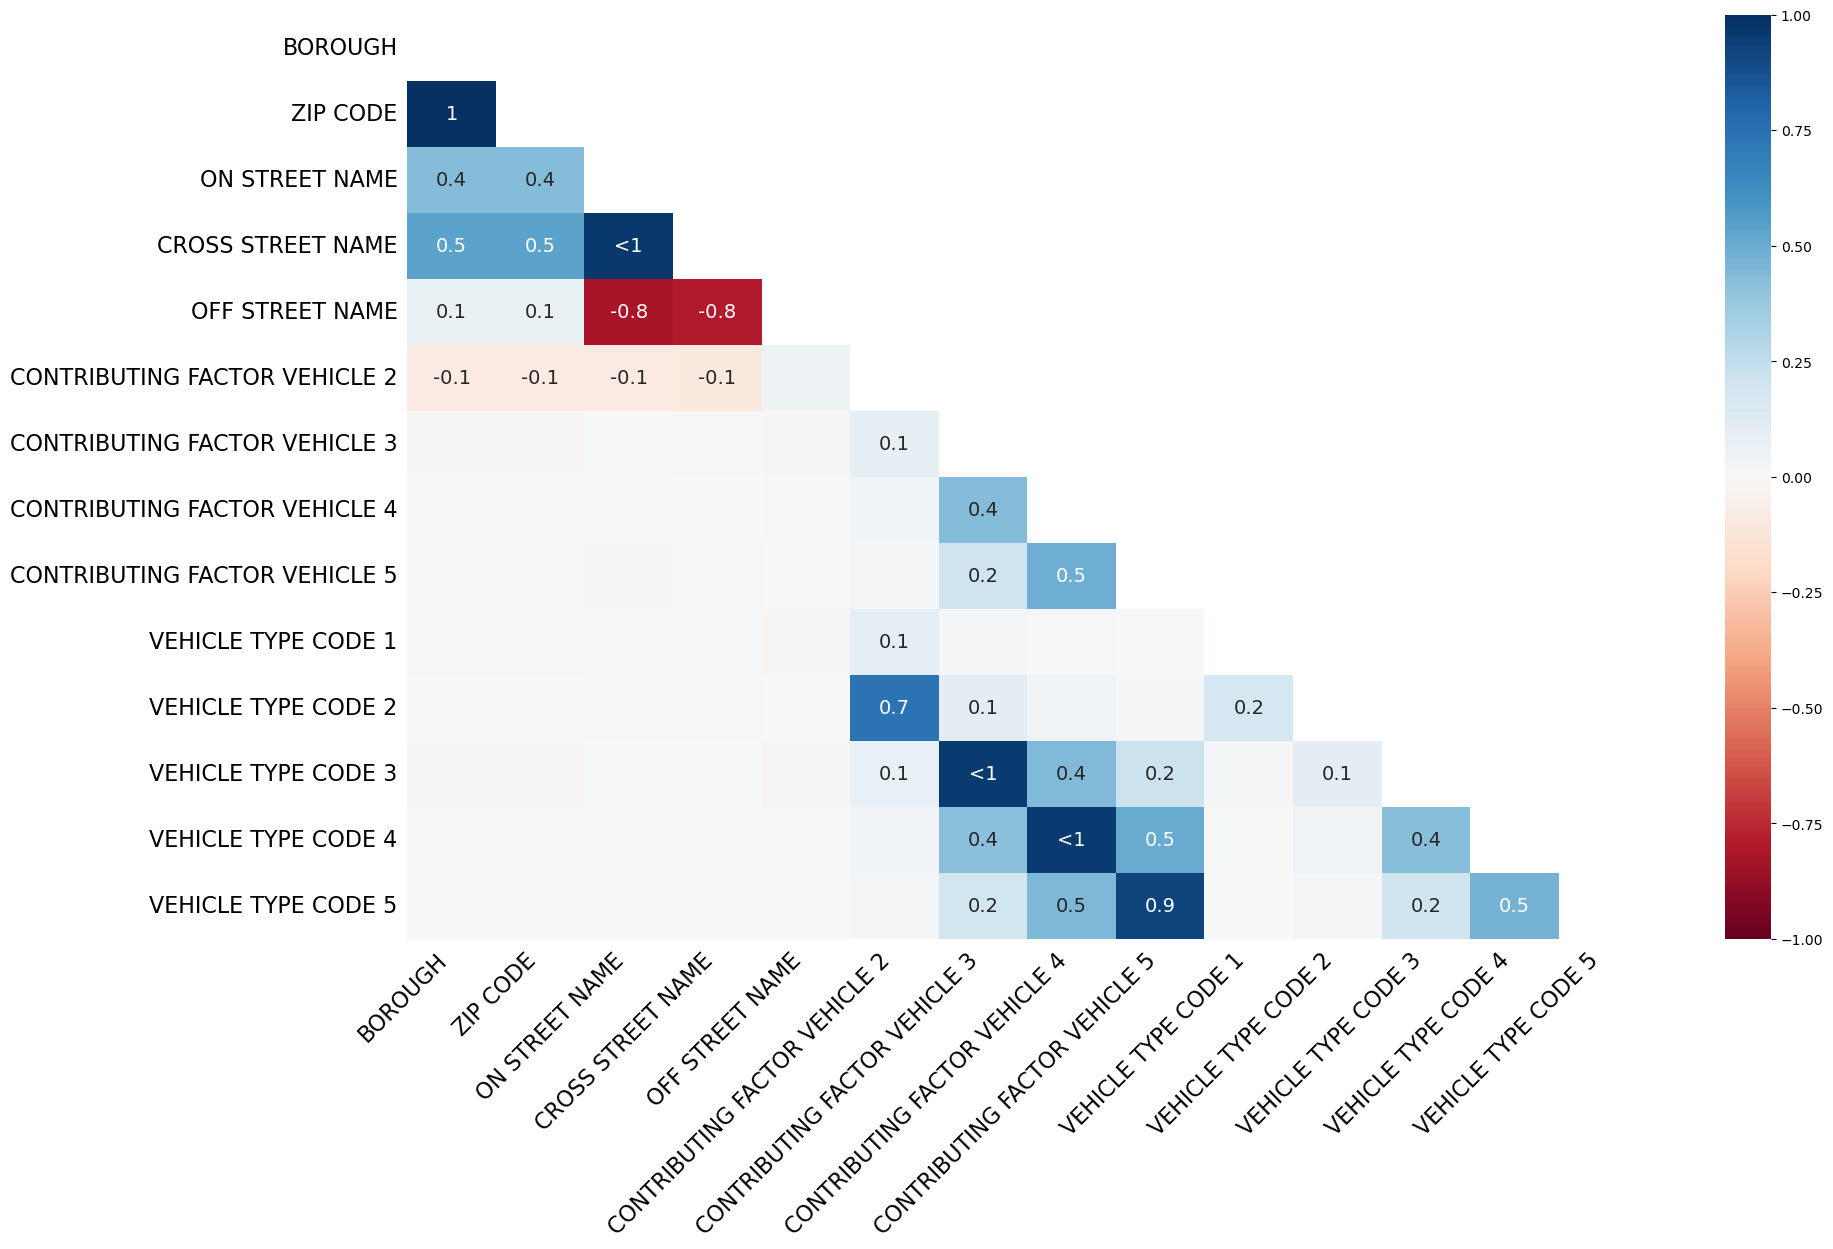

In [15]:
msno.heatmap(collisions)

<Axes: >

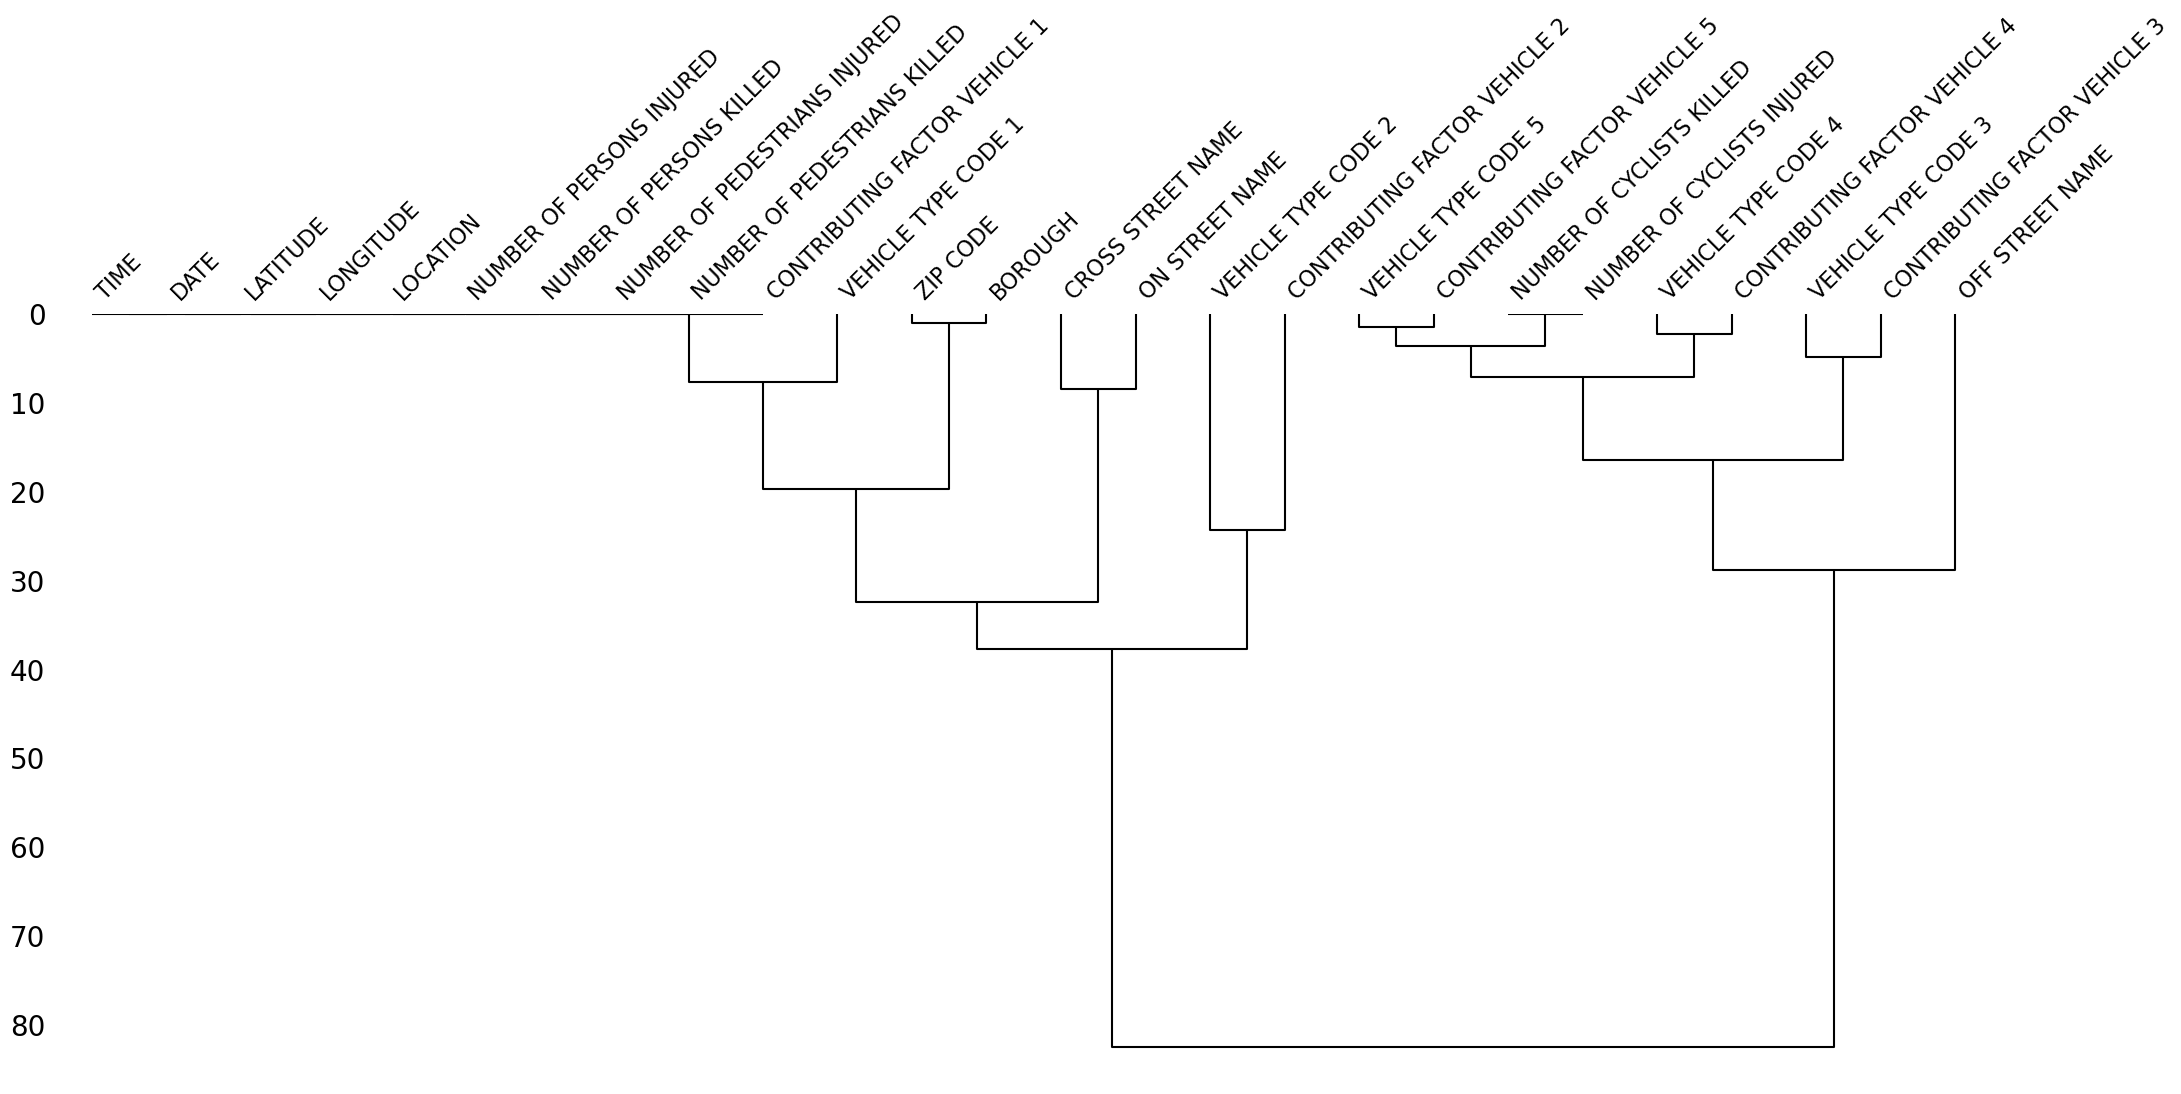

In [16]:
msno.dendrogram(collisions)

## Imputacion: mediana vs media
La imputación de datos es el proceso de reemplazar los valores faltantes en un conjunto de datos con estimaciones razonables. Este proceso es crucial en el análisis de datos, ya que los valores faltantes pueden afectar la calidad de los resultados y las conclusiones.

### Métodos Comunes de Imputación

1. **Imputación por Media**:
   - **Descripción**: Se reemplazan los valores faltantes con el promedio de la variable.
   - **Ventajas**:
     - Simple y fácil de implementar.
     - Funciona bien si los datos son aproximadamente simétricos.
   - **Desventajas**:
     - Sensible a valores atípicos (outliers), que pueden distorsionar el promedio.
     - No considera la variabilidad en los datos.

2. **Imputación por Mediana**:
   - **Descripción**: Se reemplazan los valores faltantes con la mediana de la variable.
   - **Ventajas**:
     - Menos sensible a valores atípicos, lo que la hace más robusta que la imputación por promedio.
     - Puede ser más representativa en distribuciones sesgadas.
   - **Desventajas**:
     - Puede no ser adecuada si los datos tienen una distribución normal, ya que pierde información sobre la media.

### Cuándo Usar Cada Método

- **Promedio**:
  - Útil en conjuntos de datos con una distribución normal y sin valores atípicos significativos.
  
- **Mediana**:
  - Preferible en conjuntos de datos sesgados o cuando hay valores atípicos que pueden influir en el promedio.

### Consideraciones Adicionales

- **Otros Métodos de Imputación**: Además del promedio y la mediana, existen otros métodos como la imputación por la moda, interpolación, regresión, o técnicas más avanzadas como KNN (K-Nearest Neighbors) y métodos de imputación múltiple.
- **Evaluación**: Siempre es recomendable evaluar el impacto de la imputación en el análisis posterior, ya que la forma en que se manejan los datos faltantes puede influir en los resultados.
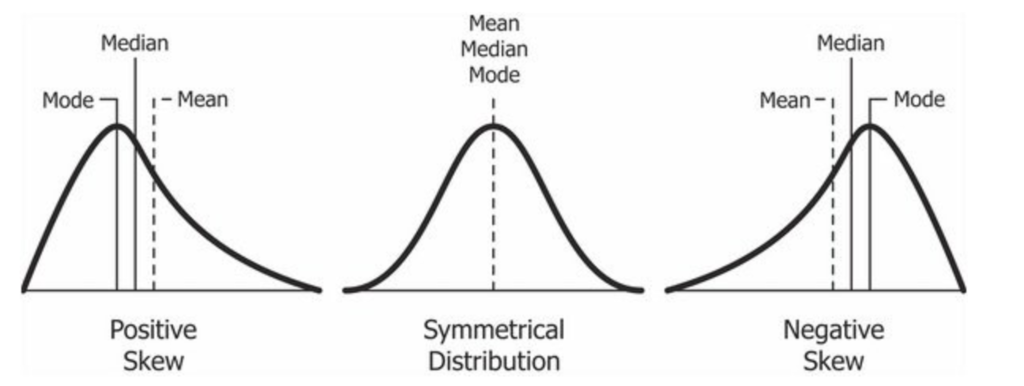

# Ejemplo Datos1T

In [17]:
# GESTACH: Edad gestacional al desenlace
# CIE10: Código de diagnostico
# Longitud_Cervix_1T_FMF: Longitud cervical en su 1er Trimestre embarazo
# SDG_1T_FMF: Semanas de Gestacion al momento de su Tamizaje

# PESO_MATERNO_1T_FMF
# TALLA_MATERNA_1T_FMF
!head Datos1T.csv

"head" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [18]:
df = pd.read_csv('Datos1T.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14114 entries, 0 to 14113
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fecha nac               14114 non-null  object 
 1   Longitud_Cervix_1T_FMF  13595 non-null  float64
 2   SDG_1T_FMF              13577 non-null  float64
 3   PESO_MATERNO_1T_FMF     14086 non-null  float64
 4   TALLA_MATERNA_1T_FMF    14081 non-null  float64
 5   GESTACH                 10631 non-null  float64
 6   CIE10                   10795 non-null  object 
dtypes: float64(5), object(2)
memory usage: 772.0+ KB


In [19]:
# Cuenta los nulos
df.isnull().sum()

Fecha nac                    0
Longitud_Cervix_1T_FMF     519
SDG_1T_FMF                 537
PESO_MATERNO_1T_FMF         28
TALLA_MATERNA_1T_FMF        33
GESTACH                   3483
CIE10                     3319
dtype: int64

<Axes: >

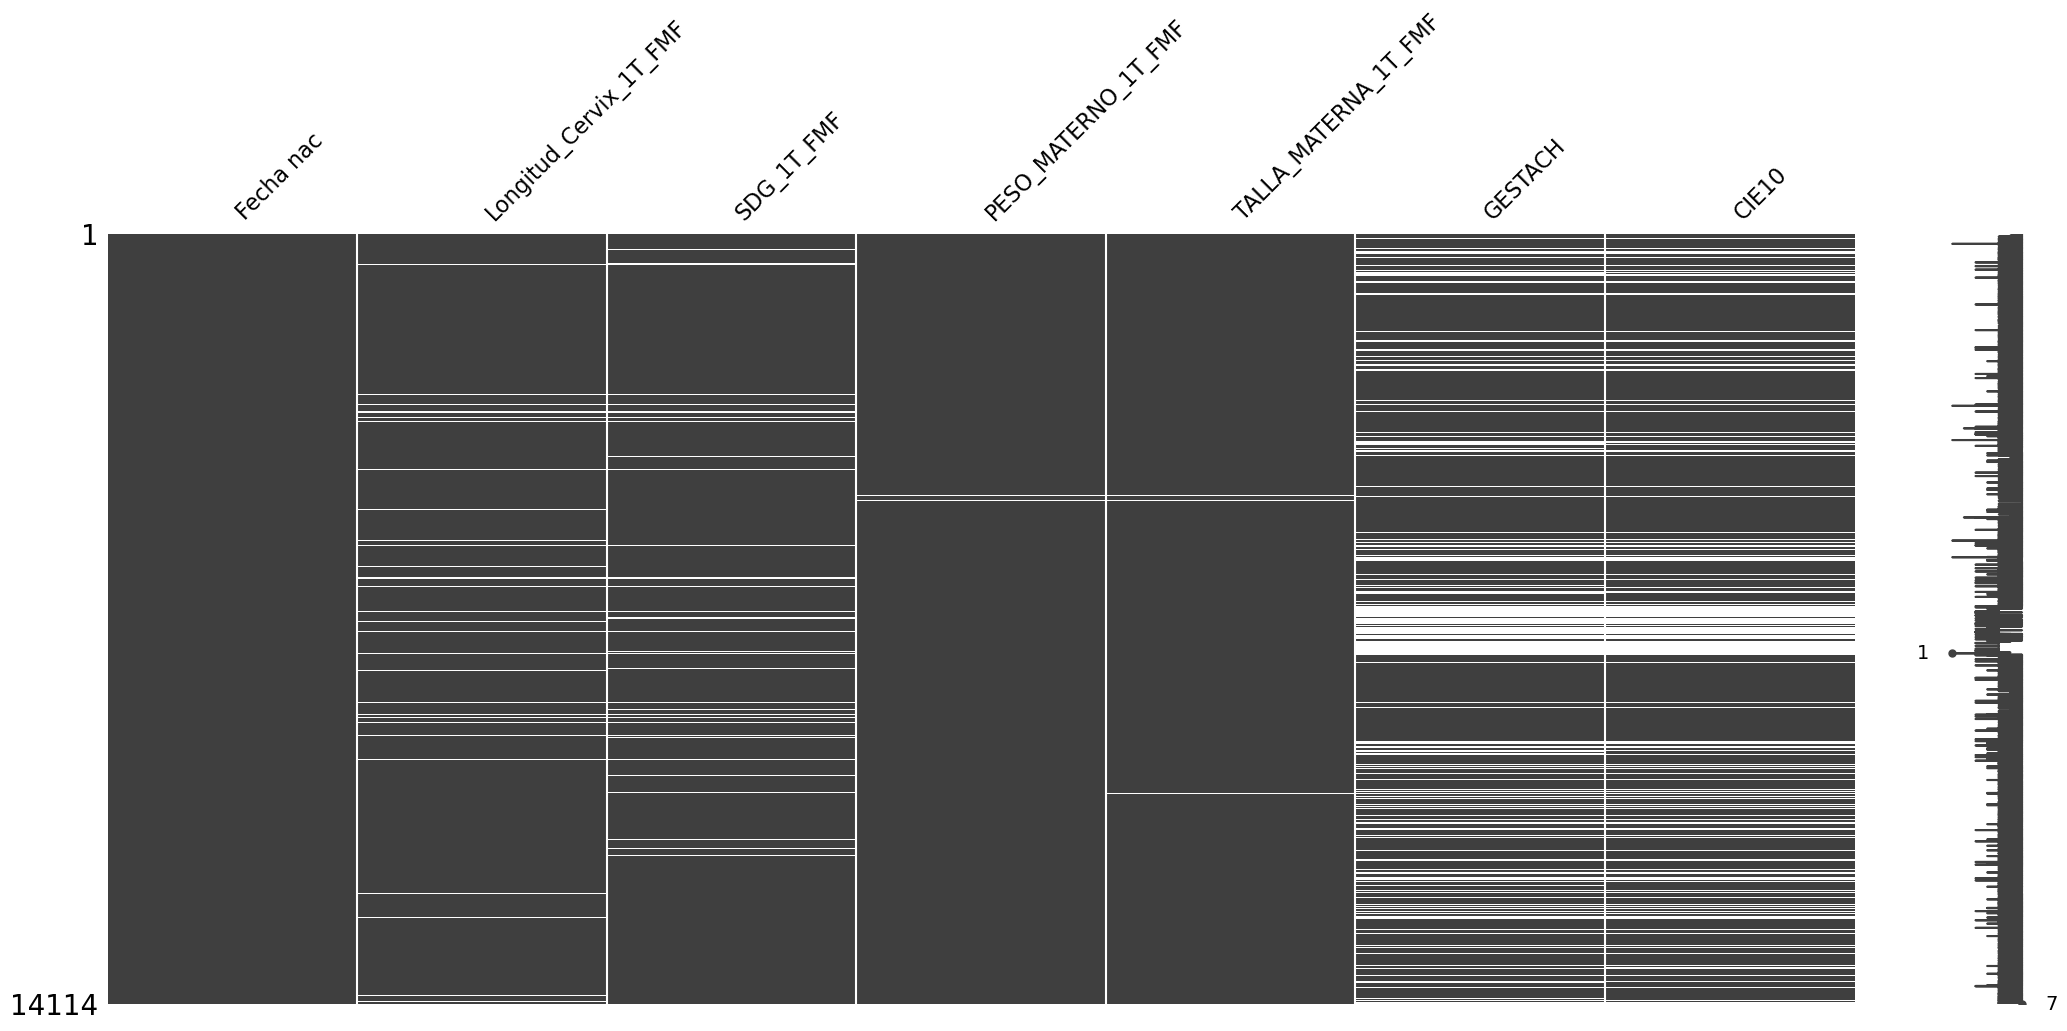

In [20]:
msno.matrix(df)

In [21]:
# media antes de imputacion
df.GESTACH.mean()

37.80980152384536

In [22]:
# si imputo por 0 -> introduzco sesgo
df.GESTACH.fillna(0).mean()
# cambio de casi 10 unidades

28.47924047045487

In [23]:
# Esto NO!!!
df.fillna(0).isnull().sum()

Fecha nac                 0
Longitud_Cervix_1T_FMF    0
SDG_1T_FMF                0
PESO_MATERNO_1T_FMF       0
TALLA_MATERNA_1T_FMF      0
GESTACH                   0
CIE10                     0
dtype: int64

In [24]:
# si imputamos con la media, obtenemos la misma media
gestach_mean = df.GESTACH.mean()
df.GESTACH.fillna(gestach_mean).mean()

37.80980152384536

In [25]:
df.GESTACH.describe()

count    10631.000000
mean        37.809802
std          4.703609
min          1.000000
25%         38.000000
50%         39.000000
75%         40.000000
max         99.000000
Name: GESTACH, dtype: float64

In [26]:
# Muestreo para verificar valores existentes
df.GESTACH.sample(10)

380      39.0
9812     38.0
6695     35.0
1935     39.0
13269    40.0
13597    40.0
4215     39.0
7278      NaN
5754      NaN
3553      NaN
Name: GESTACH, dtype: float64

In [27]:
gestach_median = df.GESTACH.median()
# Imputacion por mediana, los valores a reemplazar
# SI pertenecen a la naturaleza de los valores originales
df.GESTACH.fillna(gestach_median).describe()
# df.GESTACH = df.GESTACH.fillna(gestach_median)

count    14114.000000
mean        38.103514
std          4.114270
min          1.000000
25%         38.000000
50%         39.000000
75%         39.000000
max         99.000000
Name: GESTACH, dtype: float64

In [28]:
# PREGUNTA: Como se dieron los desenlaces de estos embarazos?
# dropna: elimina filas con al menos 1 nulo
# Cómo borramos registros faltantes?
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 10051 entries, 0 to 14109
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fecha nac               10051 non-null  object 
 1   Longitud_Cervix_1T_FMF  10051 non-null  float64
 2   SDG_1T_FMF              10051 non-null  float64
 3   PESO_MATERNO_1T_FMF     10051 non-null  float64
 4   TALLA_MATERNA_1T_FMF    10051 non-null  float64
 5   GESTACH                 10051 non-null  float64
 6   CIE10                   10051 non-null  object 
dtypes: float64(5), object(2)
memory usage: 628.2+ KB


In [29]:
# subset: solo revisa y borra registros segun estas columnas
df.dropna(subset=['GESTACH','CIE10']).info() # 'Longitud_Cervix_1T_FMF'

<class 'pandas.core.frame.DataFrame'>
Index: 10585 entries, 0 to 14109
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fecha nac               10585 non-null  object 
 1   Longitud_Cervix_1T_FMF  10220 non-null  float64
 2   SDG_1T_FMF              10208 non-null  float64
 3   PESO_MATERNO_1T_FMF     10565 non-null  float64
 4   TALLA_MATERNA_1T_FMF    10563 non-null  float64
 5   GESTACH                 10585 non-null  float64
 6   CIE10                   10585 non-null  object 
dtypes: float64(5), object(2)
memory usage: 661.6+ KB


<Axes: >

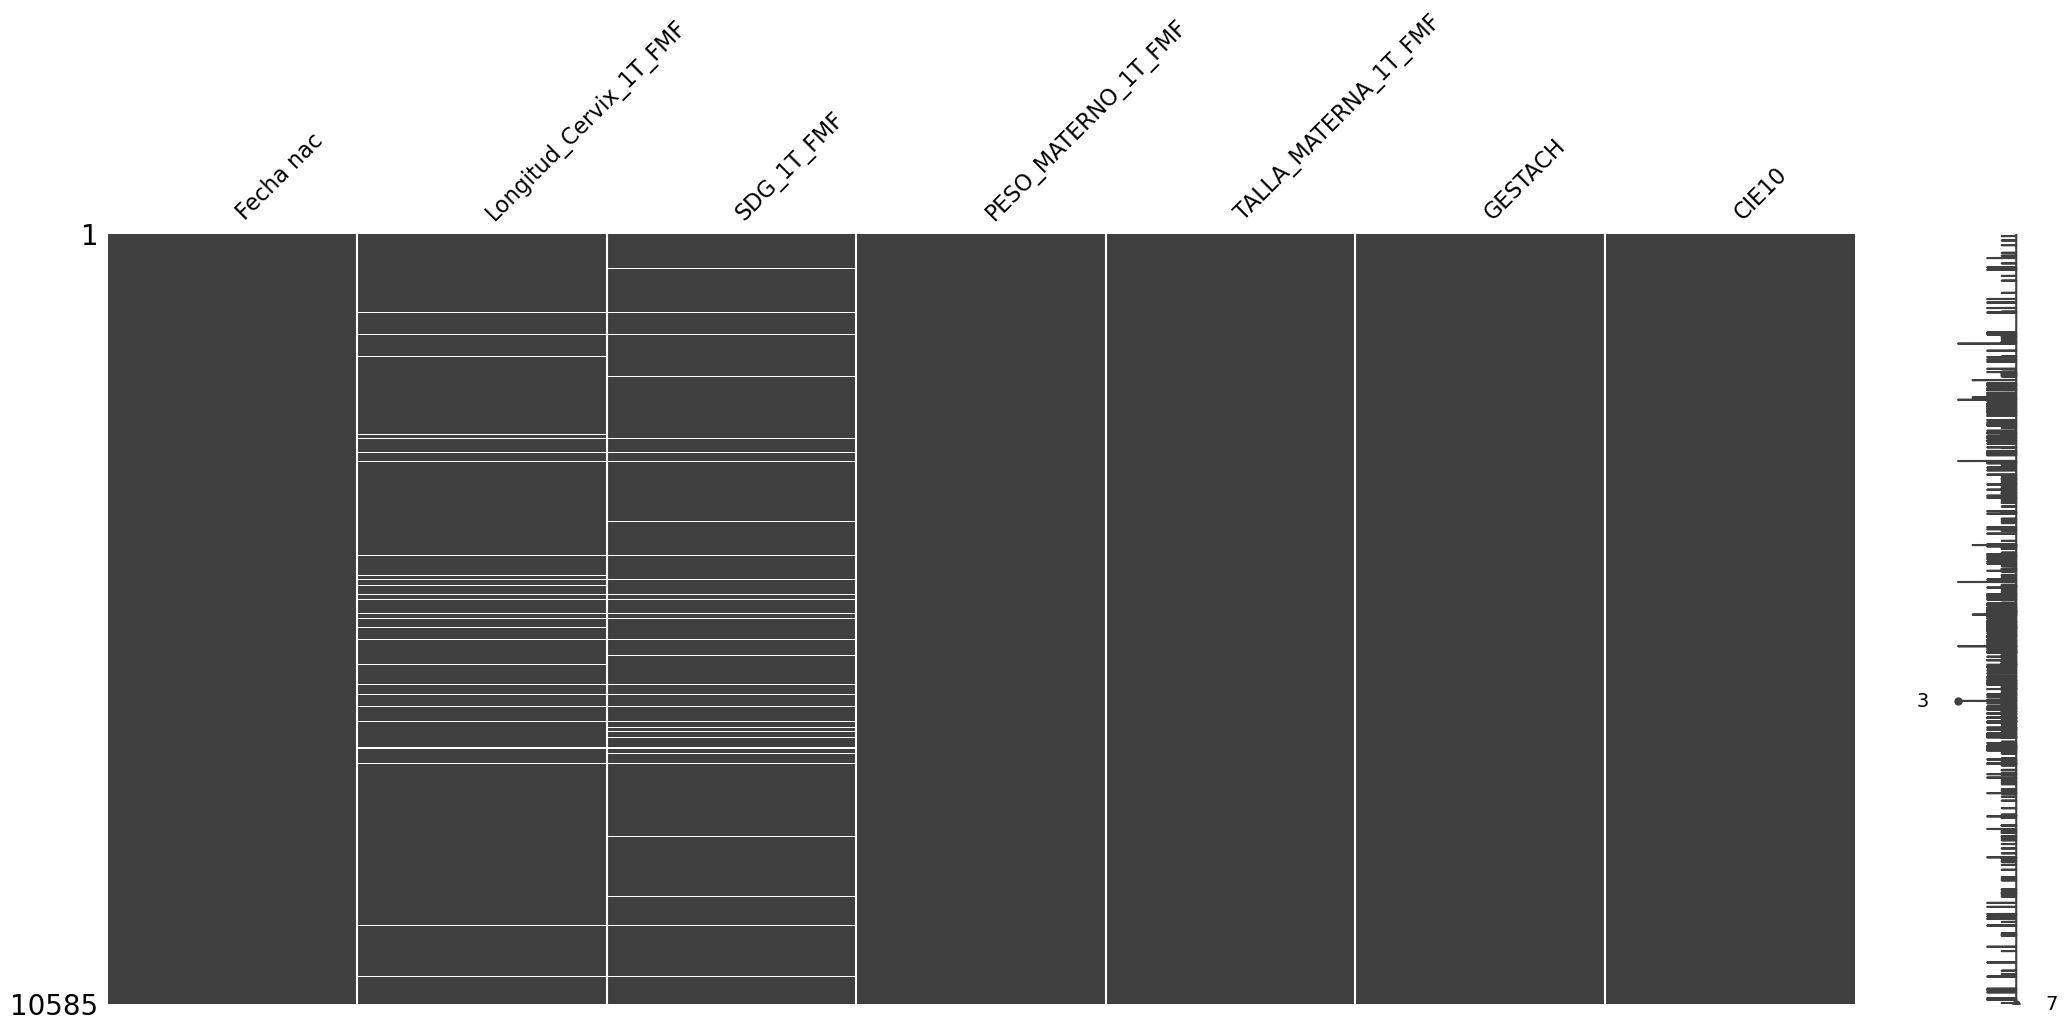

In [30]:
msno.matrix(
    df.dropna(
        subset=['GESTACH','CIE10']))

In [31]:
# Una opcion
# Thresh: requiere al menos N datos no nulos en la fila para conservarlos
df.dropna(thresh=5).info()

<class 'pandas.core.frame.DataFrame'>
Index: 13902 entries, 0 to 14113
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Fecha nac               13902 non-null  object 
 1   Longitud_Cervix_1T_FMF  13545 non-null  float64
 2   SDG_1T_FMF              13525 non-null  float64
 3   PESO_MATERNO_1T_FMF     13892 non-null  float64
 4   TALLA_MATERNA_1T_FMF    13890 non-null  float64
 5   GESTACH                 10621 non-null  float64
 6   CIE10                   10783 non-null  object 
dtypes: float64(5), object(2)
memory usage: 868.9+ KB


<Axes: >

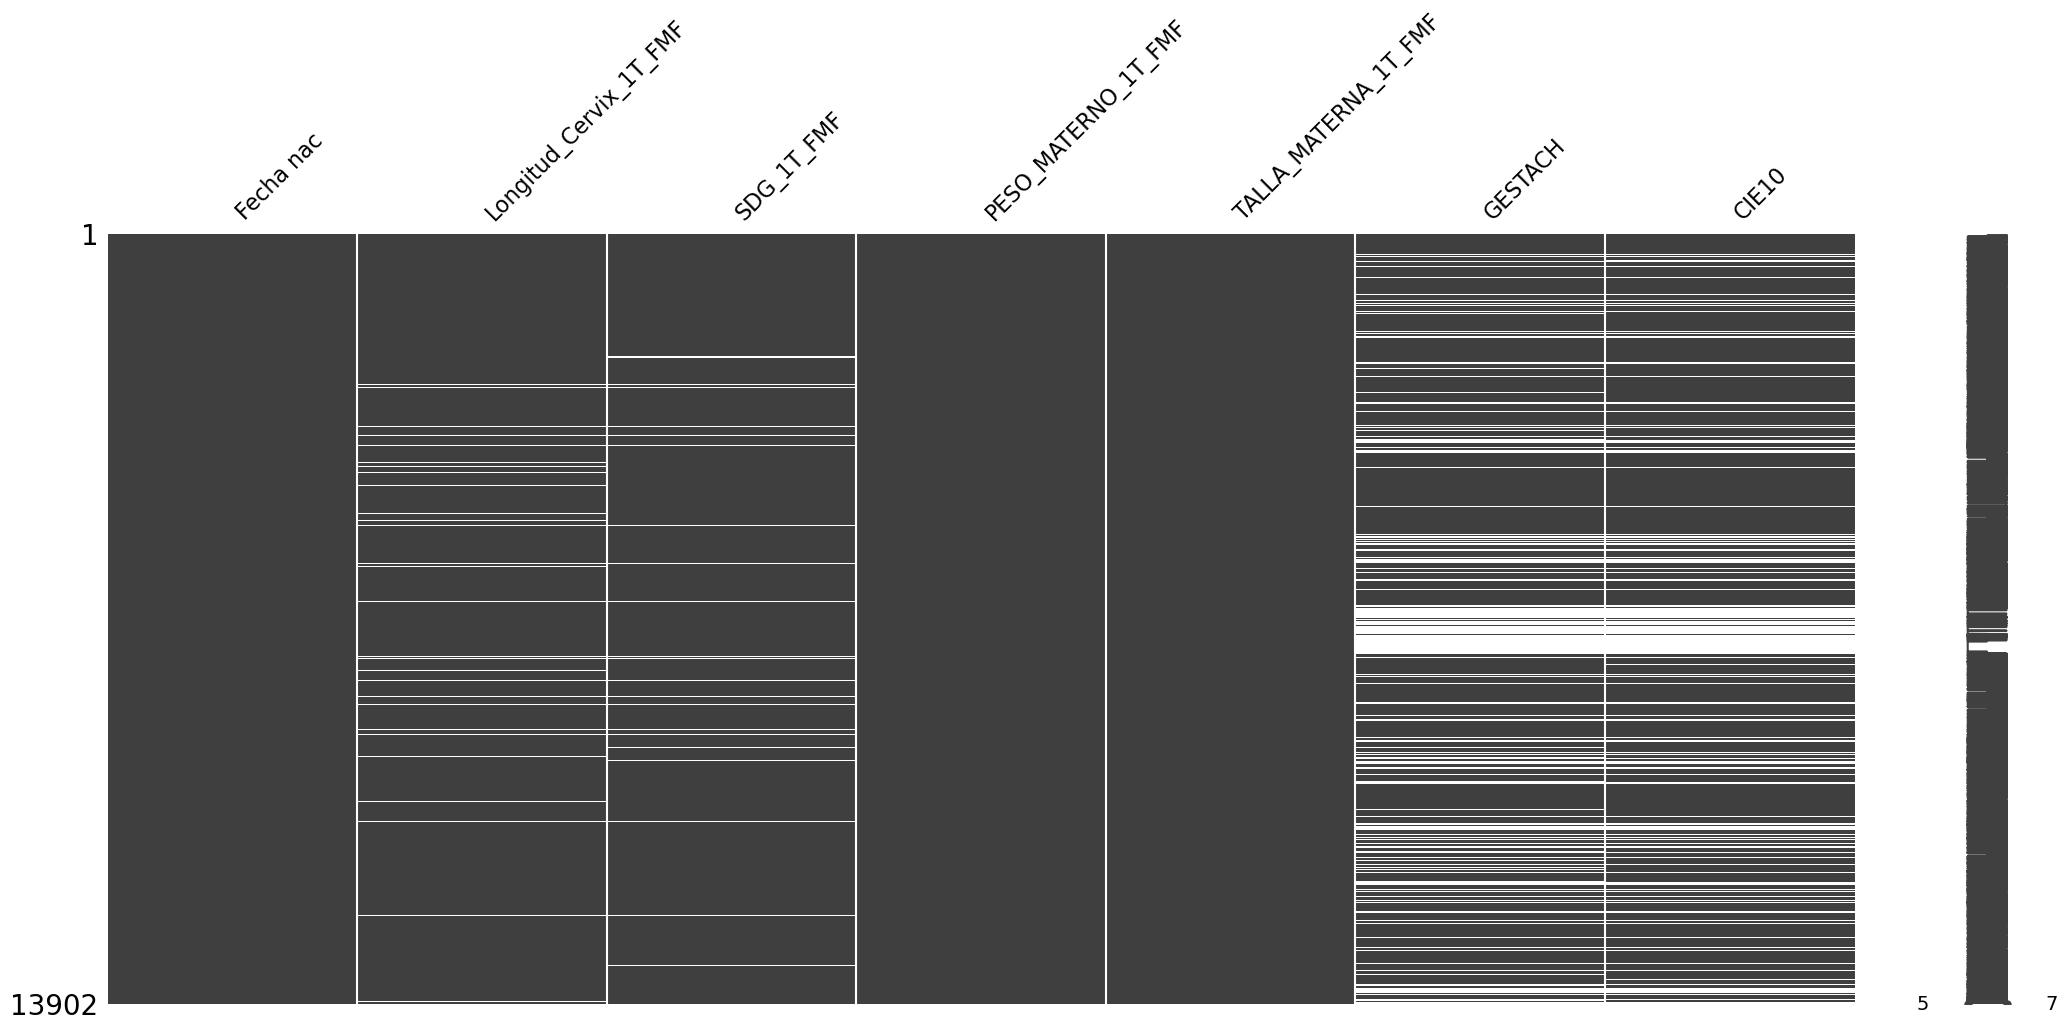

In [32]:
msno.matrix(df.dropna(thresh=5))

### Eliminación de nulos en GESTACH y CIE10

<Axes: >

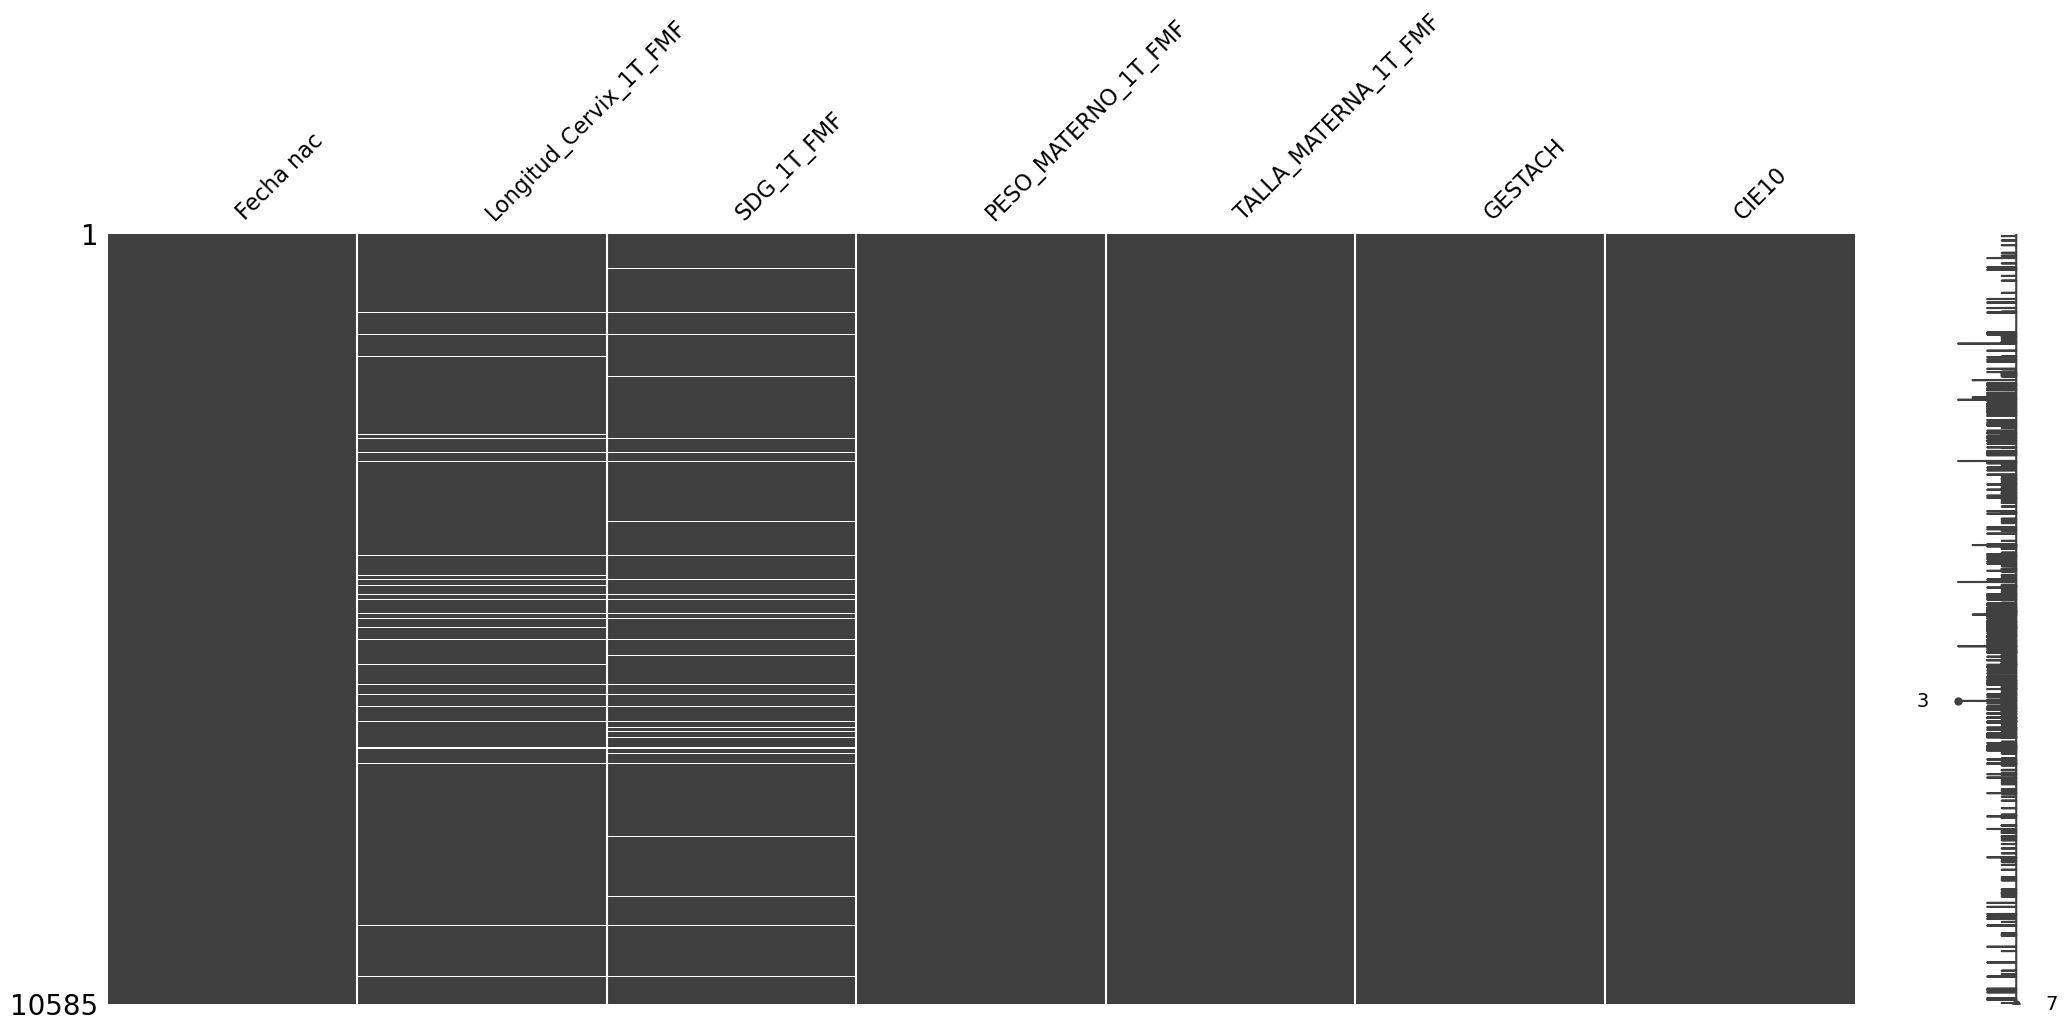

In [33]:
# Subset: borra nulos en la lista de variables proporcionadas
df.dropna(subset=['GESTACH','CIE10'], inplace=True)
msno.matrix(df)

`describe()`: proporciona un resumen de medidas estadísticas.



In [34]:
df.describe()

,Longitud_Cervix_1T_FMF,SDG_1T_FMF,PESO_MATERNO_1T_FMF,TALLA_MATERNA_1T_FMF,GESTACH
count,10220.000000,10208.000000,10565.000000,10563.000000,10585.000000
mean,34.982653,12.867702,64.501115,157.074426,37.812943
std,5.923170,0.938858,13.979373,5.952213,4.709750
min,0.870000,4.400000,30.200000,60.000000,1.000000
25%,31.800000,12.300000,54.400000,153.000000,38.000000
50%,34.100000,13.000000,62.500000,157.000000,39.000000
75%,37.700000,13.300000,72.700000,161.000000,40.000000
max,305.000000,28.000000,157.000000,185.000000,99.000000


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Longitud_Cervix_1T_FMF,10220.0,34.982653,5.923170,0.87,31.8,34.1,37.7,305.0
SDG_1T_FMF,10208.0,12.867702,0.938858,4.40,12.3,13.0,13.3,28.0
PESO_MATERNO_1T_FMF,10565.0,64.501115,13.979373,30.20,54.4,62.5,72.7,157.0
TALLA_MATERNA_1T_FMF,10563.0,157.074426,5.952213,60.00,153.0,157.0,161.0,185.0
GESTACH,10585.0,37.812943,4.709750,1.00,38.0,39.0,40.0,99.0


In [36]:
df.describe(include='all') # resumen de todas las variables

df.describe(include='object') # resumen de solo las
#variables categoricas/ordinales/nominales

,Fecha nac,CIE10
count,10585,10585
unique,5568,260
top,03/03/1998,0
freq,10,2759


### Cambio de dato: fecha_nac

In [37]:
# convertimos de Object a datetime
df['Fecha nac'] = pd.to_datetime(df['Fecha nac'], format='%d/%m/%Y')

In [38]:
# cuáles son los códigos CIE10 más frecuentes?
# O809: parto único espontáneo
df.CIE10.value_counts().nlargest(10)

CIE10
0       2759
O809    2241
O429     485
O342     391
O410     347
Z301     336
Z308     256
O365     187
Z302     176
O363     155
Name: count, dtype: int64

In [39]:
# aproximadamente el 26% de mis resultados
# no están correctamente codificados (CIE10)
df.CIE10.value_counts().nlargest(1).values / len(df)*100
# TODO: eliminar filas con '0' en CIE10

array([26.06518658])

### Imputación SDG 1T
`fillna()` es una función que nos permite "rellenar" valores nulos.

¿Qué hacer?
1. Imputar con la media o la mediana
2. Eliminarlos

In [40]:
df.SDG_1T_FMF.mean()

12.867701802507836

In [41]:
# Describe: para cada variable numérica sus descriptores estadísticos
df.SDG_1T_FMF.describe()

count    10208.000000
mean        12.867702
std          0.938858
min          4.400000
25%         12.300000
50%         13.000000
75%         13.300000
max         28.000000
Name: SDG_1T_FMF, dtype: float64

<Axes: >

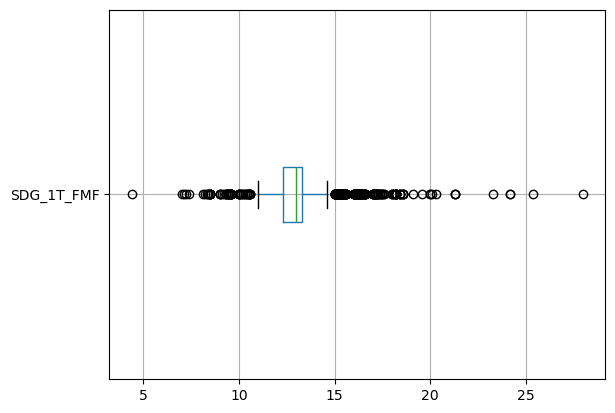

In [42]:
# Boxplot and whiskers de variable SDG 1T FMF
df.boxplot(['SDG_1T_FMF'], vert=False)

In [43]:
df.SDG_1T_FMF.isnull().sum()

377

In [44]:
# imputacion con la mediana
df.SDG_1T_FMF = df.SDG_1T_FMF.fillna(df.SDG_1T_FMF.median())
df.SDG_1T_FMF.describe() # revisamos

count    10585.000000
mean        12.872414
std          0.922311
min          4.400000
25%         12.400000
50%         13.000000
75%         13.300000
max         28.000000
Name: SDG_1T_FMF, dtype: float64

### Eliminar valores extremos según IQR
* $lower=Q1-1.5\times IQR$
* $upper=Q3+1.5\times IQR$
* $IQR = Q3-Q1$

In [45]:
# Calculo de IQR
q1 = df.SDG_1T_FMF.quantile(.25)
q3 = df.SDG_1T_FMF.quantile(.75)
iqr = q3 - q1
print(iqr)

0.9000000000000004


In [46]:
# Calculo de whiskers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(lower,upper)

11.05 14.650000000000002


In [47]:
# Masks
es_outlier_low = df.SDG_1T_FMF < lower
es_outlier_up = df.SDG_1T_FMF > upper
df.SDG_1T_FMF.loc[(es_outlier_low)] # cuales son extremos (low)

29       10.3
93       11.0
223       7.0
332       9.1
1752      9.6
         ... 
13653     7.2
13734     8.1
13771    11.0
13884     9.0
14068     8.4
Name: SDG_1T_FMF, Length: 73, dtype: float64

In [48]:
df.SDG_1T_FMF.loc[(es_outlier_up)] # cuales son extremos (up)

87       16.0
1770     16.5
1809     18.4
1834     16.1
1933     15.1
         ... 
13732    20.1
13876    18.4
13897    17.2
14074    17.0
14100    18.2
Name: SDG_1T_FMF, Length: 204, dtype: float64

In [49]:
# Cuantos atipicos segun SDG?
valores_atipicos = es_outlier_up | es_outlier_low
valores_atipicos.sum() # cuento

277

In [50]:
# devuelve valores tipicos segun SDG
df[~valores_atipicos]

,Fecha nac,Longitud_Cervix_1T_FMF,SDG_1T_FMF,PESO_MATERNO_1T_FMF,TALLA_MATERNA_1T_FMF,GESTACH,CIE10
0,1990-03-19,43.3,13.6,65.0,155.0,37.0,Z302
1,1997-08-12,34.8,13.5,56.0,159.0,39.0,O809
2,2000-08-25,34.6,13.3,57.0,149.0,41.0,O809
3,1984-05-27,41.6,13.4,67.5,153.0,39.0,0
4,1991-02-21,36.0,12.0,70.5,160.0,38.0,O600
...,...,...,...,...,...,...,...
14090,1988-05-09,33.5,13.0,53.9,163.0,32.0,O601
14093,1987-07-12,32.6,12.4,81.2,161.0,35.0,O13X
14097,1990-06-07,33.0,13.0,61.0,162.0,8.0,O020
14106,1991-09-04,32.2,13.1,56.9,157.0,39.0,O441


<Axes: >

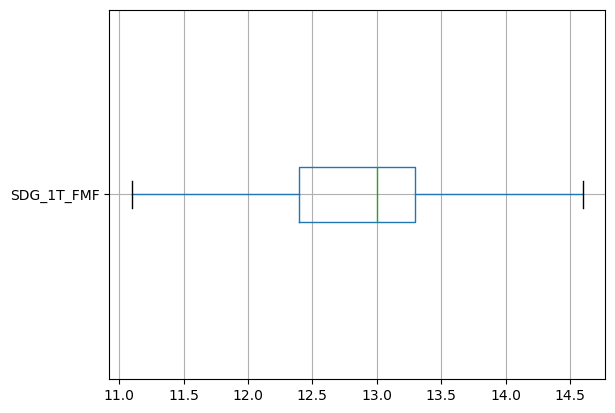

In [51]:
df_clean = df[~valores_atipicos] # Creo DF con valores "limpios" para SDG
df_clean.boxplot(['SDG_1T_FMF'], vert=False)

In [52]:
# Aproximadamente una cuarta parte de los registros no están debidamente codificados
df_clean.CIE10.value_counts().nlargest(1)/df.shape[0]*100

CIE10
0    25.564478
Name: count, dtype: float64

<Axes: >

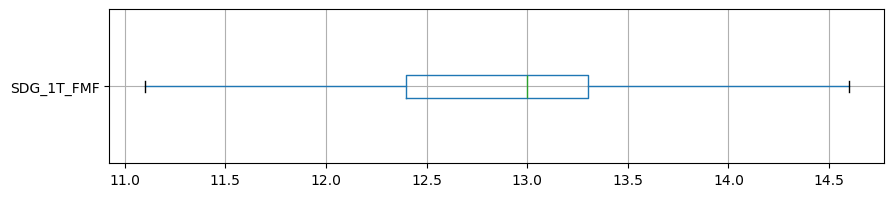

In [53]:
df_clean[['SDG_1T_FMF']].boxplot(vert=False, figsize=(10,2))

In [54]:
df_cln = df[~valores_atipicos] # tomar aquellos que NO están fuera de rango
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10308 entries, 0 to 14109
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha nac               10308 non-null  datetime64[ns]
 1   Longitud_Cervix_1T_FMF  9981 non-null   float64       
 2   SDG_1T_FMF              10308 non-null  float64       
 3   PESO_MATERNO_1T_FMF     10294 non-null  float64       
 4   TALLA_MATERNA_1T_FMF    10294 non-null  float64       
 5   GESTACH                 10308 non-null  float64       
 6   CIE10                   10308 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 644.2+ KB


<Axes: >

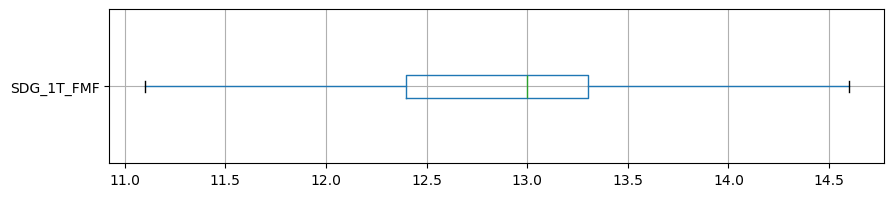

In [55]:
df_cln[['SDG_1T_FMF']].boxplot(vert=False, figsize=(10,2))

In [56]:
df_cln['SDG_1T_FMF'].describe()

count    10308.000000
mean        12.822866
std          0.668277
min         11.100000
25%         12.400000
50%         13.000000
75%         13.300000
max         14.600000
Name: SDG_1T_FMF, dtype: float64

In [57]:
# Imputamos con la mediana
df_cln['SDG_1T_FMF'].fillna(df_cln['SDG_1T_FMF'].median(), inplace=True)

C:\Users\pomar\AppData\Local\Temp\ipykernel_27108\3923203834.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cln['SDG_1T_FMF'].fillna(df_cln['SDG_1T_FMF'].median(), inplace=True)
C:\Users\pomar\AppData\Local\Temp\ipykernel_27108\3923203834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cln['SDG_1T_FMF'].fillna(df_cln['SDG_1T_FMF

In [58]:
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10308 entries, 0 to 14109
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha nac               10308 non-null  datetime64[ns]
 1   Longitud_Cervix_1T_FMF  9981 non-null   float64       
 2   SDG_1T_FMF              10308 non-null  float64       
 3   PESO_MATERNO_1T_FMF     10294 non-null  float64       
 4   TALLA_MATERNA_1T_FMF    10294 non-null  float64       
 5   GESTACH                 10308 non-null  float64       
 6   CIE10                   10308 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 644.2+ KB


### Limpieza de Longitud_Cervix_1T_FMF

<Axes: >

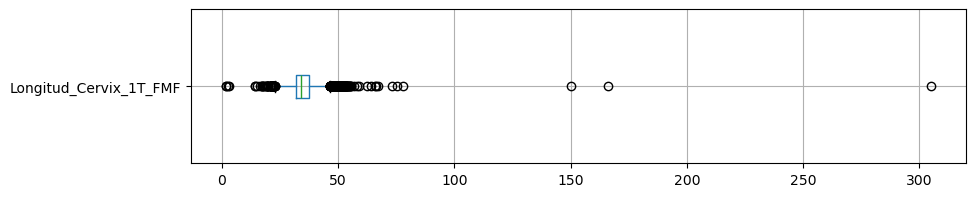

In [59]:
df_cln[['Longitud_Cervix_1T_FMF']].boxplot(vert=False, figsize=(10,2))

In [60]:
df_cln['Longitud_Cervix_1T_FMF'].describe()

count    9981.000000
mean       34.993912
std         5.936047
min         2.000000
25%        31.800000
50%        34.100000
75%        37.700000
max       305.000000
Name: Longitud_Cervix_1T_FMF, dtype: float64

In [61]:
# Masks
bajos = df_cln['Longitud_Cervix_1T_FMF'] <= 24
altos = df_cln['Longitud_Cervix_1T_FMF'] >= 44

# Cuantos atipicos segun Long Cervix?
valores_atipicos = bajos | altos
valores_atipicos.sum()

589

In [62]:
df_cln = df_cln[~valores_atipicos] # tomar aquellos que NO están fuera de rango
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9719 entries, 0 to 14109
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha nac               9719 non-null   datetime64[ns]
 1   Longitud_Cervix_1T_FMF  9392 non-null   float64       
 2   SDG_1T_FMF              9719 non-null   float64       
 3   PESO_MATERNO_1T_FMF     9705 non-null   float64       
 4   TALLA_MATERNA_1T_FMF    9705 non-null   float64       
 5   GESTACH                 9719 non-null   float64       
 6   CIE10                   9719 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 607.4+ KB


In [63]:
df_cln['Longitud_Cervix_1T_FMF'].describe()

count    9392.000000
mean       34.396345
std         3.889441
min        24.100000
25%        31.700000
50%        33.900000
75%        37.000000
max        43.900000
Name: Longitud_Cervix_1T_FMF, dtype: float64

<Axes: >

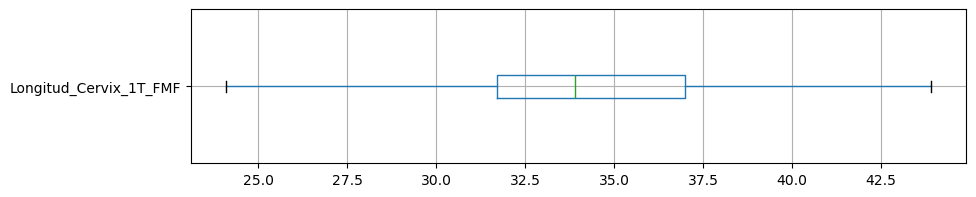

In [64]:
df_cln[['Longitud_Cervix_1T_FMF']].boxplot(vert=False, figsize=(10,2))

In [65]:
df_cln['Longitud_Cervix_1T_FMF'].fillna(df_cln['Longitud_Cervix_1T_FMF'].mean(),inplace=True)
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9719 entries, 0 to 14109
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha nac               9719 non-null   datetime64[ns]
 1   Longitud_Cervix_1T_FMF  9719 non-null   float64       
 2   SDG_1T_FMF              9719 non-null   float64       
 3   PESO_MATERNO_1T_FMF     9705 non-null   float64       
 4   TALLA_MATERNA_1T_FMF    9705 non-null   float64       
 5   GESTACH                 9719 non-null   float64       
 6   CIE10                   9719 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 607.4+ KB


C:\Users\pomar\AppData\Local\Temp\ipykernel_27108\2888581319.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cln['Longitud_Cervix_1T_FMF'].fillna(df_cln['Longitud_Cervix_1T_FMF'].mean(),inplace=True)


In [66]:
df_cln['Fecha nac'] = pd.to_datetime(df_cln['Fecha nac'])
df_cln

,Fecha nac,Longitud_Cervix_1T_FMF,SDG_1T_FMF,PESO_MATERNO_1T_FMF,TALLA_MATERNA_1T_FMF,GESTACH,CIE10
0,1990-03-19,43.3,13.6,65.0,155.0,37.0,Z302
1,1997-08-12,34.8,13.5,56.0,159.0,39.0,O809
2,2000-08-25,34.6,13.3,57.0,149.0,41.0,O809
3,1984-05-27,41.6,13.4,67.5,153.0,39.0,0
4,1991-02-21,36.0,12.0,70.5,160.0,38.0,O600
...,...,...,...,...,...,...,...
14090,1988-05-09,33.5,13.0,53.9,163.0,32.0,O601
14093,1987-07-12,32.6,12.4,81.2,161.0,35.0,O13X
14097,1990-06-07,33.0,13.0,61.0,162.0,8.0,O020
14106,1991-09-04,32.2,13.1,56.9,157.0,39.0,O441


In [68]:
q1 = df_cln['Longitud_Cervix_1T_FMF'].quantile(.25)
q3 = df_cln['Longitud_Cervix_1T_FMF'].quantile(.75)
iqr = q3 - q1
print(iqr)

5.099999999999998


In [69]:
df_cln['Longitud_Cervix_1T_FMF'].describe()

count    9719.000000
mean       34.396345
std         3.823444
min        24.100000
25%        31.800000
50%        34.000000
75%        36.900000
max        43.900000
Name: Longitud_Cervix_1T_FMF, dtype: float64

In [73]:
df_cln['Longitud_Cervix_1T_FMF'].fillna(df_clean['Longitud_Cervix_1T_FMF'].mean(), inplace=True)
df_cln.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 9719 entries, 0 to 14109
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha nac               9719 non-null   datetime64[ns]
 1   Longitud_Cervix_1T_FMF  9719 non-null   float64       
 2   SDG_1T_FMF              9719 non-null   float64       
 3   PESO_MATERNO_1T_FMF     9705 non-null   float64       
 4   TALLA_MATERNA_1T_FMF    9705 non-null   float64       
 5   GESTACH                 9719 non-null   float64       
 6   CIE10                   9719 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 607.4+ KB


C:\Users\pomar\AppData\Local\Temp\ipykernel_27108\994702112.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cln['Longitud_Cervix_1T_FMF'].fillna(df_clean['Longitud_Cervix_1T_FMF'].mean(), inplace=True)


,Fecha nac,Longitud_Cervix_1T_FMF,SDG_1T_FMF,PESO_MATERNO_1T_FMF,TALLA_MATERNA_1T_FMF,GESTACH,CIE10
0,1990-03-19,43.3,13.6,65.0,155.0,37.0,Z302
1,1997-08-12,34.8,13.5,56.0,159.0,39.0,O809
2,2000-08-25,34.6,13.3,57.0,149.0,41.0,O809
3,1984-05-27,41.6,13.4,67.5,153.0,39.0,0
4,1991-02-21,36.0,12.0,70.5,160.0,38.0,O600
...,...,...,...,...,...,...,...
14093,1987-07-12,32.6,12.4,81.2,161.0,35.0,O13X
14097,1990-06-07,33.0,13.0,61.0,162.0,8.0,O020
14100,1992-01-07,32.2,18.2,63.2,153.0,38.0,O621
14106,1991-09-04,32.2,13.1,56.9,157.0,39.0,O441


In [ ]:
df_cln

<Axes: >

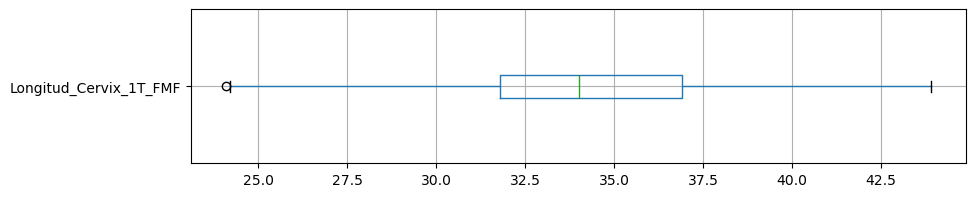

In [74]:
df_cln[['Longitud_Cervix_1T_FMF']].boxplot(vert=False, figsize=(10,2))